# Create Crypto Index

In [1]:
import pandas as pd
import datetime
import os

### Parameters

In [2]:
asset_ticket = "BTCUSDT"
timestamp = "1d"
start_date = "01 Jan, 2017"
end_date = "31 Dec, 2022"

In [3]:
input_data_path = '../../../data/30_technical_indicators'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed_and_technical_indicators"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [4]:
df = pd.read_csv(full_path_input_data)

In [5]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_U,BBANDS_M,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open
0,1513209600000,16030.34,16445.00,15450.00,16334.98,11616.867151,1513295999999,1.860925e+08,86150,5999.075173,...,18391.237211,12695.5200,6999.802789,85678.916045,1570.046351,27.522205,12570.039200,1.025867,0.963797,1.019004
1,1513296000000,16334.98,17991.00,16298.45,17539.83,9181.273947,1513382399999,1.598097e+08,85478,4712.578400,...,18896.019332,13137.5110,7379.002668,89965.427218,1578.796612,27.561481,12668.038416,1.101379,0.997764,1.073759
2,1513382400000,17516.81,19539.00,17190.01,19102.66,4202.628709,1513468799999,7.629372e+07,51777,2308.847163,...,19641.813804,13636.2430,7630.672196,92606.725304,1633.810425,27.275392,12880.956879,1.115443,0.981344,1.090533
3,1513468800000,19120.19,19798.68,18510.00,18860.02,9177.183434,1513555199999,1.758674e+08,84581,4197.960835,...,20220.319637,14096.7440,7973.168363,88414.794602,1609.158252,27.027934,13280.439467,1.035486,0.968087,0.986393
4,1513555200000,18860.04,19300.00,17029.98,18856.25,10624.633071,1513641599999,1.963392e+08,91956,4690.302146,...,20684.597174,14544.7165,8404.835826,94885.560372,1656.362662,26.783773,13801.898709,1.023328,0.902966,0.999799


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open_time                     1843 non-null   int64  
 1   open                          1843 non-null   float64
 2   high                          1843 non-null   float64
 3   low                           1843 non-null   float64
 4   close                         1843 non-null   float64
 5   volume                        1843 non-null   float64
 6   close_time                    1843 non-null   int64  
 7   quote_asset_volumne           1843 non-null   float64
 8   number_of_trades              1843 non-null   int64  
 9   taker_buy_base_asset_volume   1843 non-null   float64
 10  taker_buy_quote_asset_volume  1843 non-null   float64
 11  ignore                        1843 non-null   int64  
 12  formatted_open_time           1843 non-null   object 
 13  for

### Set the index on the dataframe

In [7]:
df['date_index'] = df['date']
df.set_index('date_index', inplace=True)

### Add time-to-chart return

In [8]:
df['time_to_chart_return'] = (df['close']/ df['close'].shift(1)) -1

In [9]:
df.shape

(1843, 90)

In [10]:
#Drop all Not a number values using drop method.
df.dropna(inplace = True)

In [11]:
df.shape

(1842, 90)

### add the [crypto_index]

In [12]:
df['crypto_index'] = ((1 + df['time_to_chart_return']).cumprod()) * 1000

In [13]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-12-30,1514592000000,14378.99,14398.85,11750.00,12440.01,19221.158039,1514678399999,2.478040e+08,190204,9530.517860,...,11878.740688,103882.356091,2110.914665,30.374875,17253.065519,1.001381,0.817164,0.865152,-0.134843,865.157279
2017-12-31,1514678400000,12345.10,14050.11,12149.98,13716.36,11768.989718,1514764799999,1.552833e+08,138893,6085.523277,...,11658.407876,111516.996771,2095.858618,29.048199,17001.382899,1.138112,0.984195,1.111077,0.102600,953.922762
2018-01-01,1514764800000,13715.65,13818.55,12750.00,13380.00,8609.915844,1514851199999,1.147997e+08,105595,3961.938946,...,11411.276475,113059.618444,2022.479431,27.712085,16759.767583,1.007502,0.929595,0.975528,-0.024523,930.530152
2018-01-02,1514851200000,13382.16,15473.49,12890.02,14675.11,20078.092111,1514937599999,2.797171e+08,177728,11346.326739,...,11338.958257,120728.085377,2062.550186,26.690253,16527.816879,1.156277,0.963224,1.096617,0.096794,1020.600324
2018-01-03,1514937600000,14690.00,15307.56,14150.00,14919.51,15905.667639,1515023999999,2.361169e+08,162787,8994.953566,...,11287.589377,125969.607179,1997.908030,25.794256,16305.144204,1.042039,0.963240,1.015624,0.016654,1037.597452


<AxesSubplot:title={'center':'crypto_index'}, xlabel='formatted_open_time'>

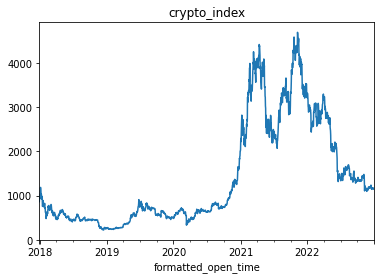

In [14]:
df['crypto_index'].plot(title='crypto_index')

## Export the Data

### Export parameters

In [15]:
export_path = "../../../data/40_crypto_index"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed_technical_indicators_and_crypto_index"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [16]:
df.to_csv(full_export_path, index=False)